# 1. Problem Definition

During the initial start of the vaccines (particularly 2020-2021), there had been many myths and doubts going on in people's minds about it's effectiveness. Due to this, they were hesitant in taking the vaccine. This thinking could be due to various reasons like age, health issues, political trust, etc. We will be looking at all these factors and divide our problem definitions into multiple questions as below :-

1. Were people with certain diseases like diabetes say that the vaccine is ineffective ?
2. Were people with certain political beliefs say that the vaccine is ineffective ?
3. Were people that don't belive in the science behind it say that the vaccine is ineffective ?
4. Were people who say that the vaccines are not safe are also saying that it is ineffective ?
5. Could profession impact the thinking of vaccine effectiveness ?
6. Does people who think that COVID-19 is not a dangerous threat also thinks that the vaccine is ineffective ?

# 2. Data description

We will be using two data sets to support our problem statements. Both the data are in tabular format (having rows or observations and columns or features). 

The first data set (owid-covid-data.csv) contains <i><b>67</b> features</i> and <i><b>256060</b> observations</i>.

In [2]:
import pandas as pd

data1 = pd.read_csv('owid-covid-data.csv')

# print number of observations and features
print(data1.shape)

# print all the features
print(data1.columns)

(256060, 67)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

From the above data set, we will be looking only at <b>date and diabetes_prevalence</b> because these will support our first problem statement.

The second data set (Raw Data_Vaccine hesitancy globally 2020-2021_upload.xlsx) contains <i><b>79</b> features</i> and <i><b>23135</b> observations</i>

In [3]:
data2 = pd.read_excel('Raw.Data_Vaccine.hesitancy.globally.2020-2021_upload.xlsx')

print(data2.columns)

print(data2.shape)

Index(['Country', 'COVID-19 is a dangerous health threat.',
       'COVID-19 can be prevented by vaccination.',
       'The risks of COVID-19 disease are greater than the risks of the vaccine',
       'The COVID-19 vaccines available to me are safe',
       'I trust that my government is able to deliver the COVID-19 vaccine to everyone, everywhere in my country, equally.',
       'I trust the science behind the COVID-19 vaccines.',
       'Have you received at least one dose of a COVID-19 vaccine?',
       'I will take the COVID-19 vaccine when it is available to me.',
       'I will have my child get the COVID-19 vaccine when it is available for them.',
       'I will take the COVID-19 vaccine if my employer recommends it.',
       'I will take the COVID-19 vaccine if my doctor recommends it.',
       'Employers should require that their employees take a COVID-19 vaccine.',
       'The government should require people to take a COVID-19 vaccine.',
       'Universities should require s

For the sake of reading and clarity, we will rename the columns names in which we are interested in.

In [4]:
data2.columns.values[1] = 'health_threat'
data2.columns.values[2] = 'effective_vaccine'
data2.columns.values[4] = 'safe_vaccine'
data2.columns.values[5] = 'trust_on_government'
data2.columns.values[6] = 'trust_on_science'
data2.columns.values[23] = 'Profession'

data2.columns

Index(['Country', 'health_threat', 'effective_vaccine',
       'The risks of COVID-19 disease are greater than the risks of the vaccine',
       'safe_vaccine', 'trust_on_government', 'trust_on_science',
       'Have you received at least one dose of a COVID-19 vaccine?',
       'I will take the COVID-19 vaccine when it is available to me.',
       'I will have my child get the COVID-19 vaccine when it is available for them.',
       'I will take the COVID-19 vaccine if my employer recommends it.',
       'I will take the COVID-19 vaccine if my doctor recommends it.',
       'Employers should require that their employees take a COVID-19 vaccine.',
       'The government should require people to take a COVID-19 vaccine.',
       'Universities should require students to take a COVID-19 vaccine.',
       'School children should be required to take a COVID-19 vaccine.',
       'Proof of vaccination should be required to enter indoor activities like cinema auditoriums, concerts and sports a

This data set will help us solving rest of the problem statements (2,3,4,5 and 6).

Our target variable will be <b>effective_vaccine</b> that contains categorical values. Let's check those values.

In [5]:
data2['effective_vaccine'].value_counts(dropna=True)

Strongly agree       9489
Somewhat agree       8833
Unsure/no opinion    2747
Somewhat disagree    1252
Strongly disagree     814
Name: effective_vaccine, dtype: int64

# 3. Feature engineering and data processing

To understand vaccine hesitancy, we need to combine the two data sets. We will use <i>location</i> column from the first data set and <i>Country</i> column from the second data set for joining the two data sets and we will select only those columns that are meant for our research or investigation. 

The hesitancy was more in the initial times (specifically between 2020 and 2021) when there were hardly any results or less results to conclude that the vaccine is effective. 

In [6]:
# merging two data sets and selecting only required columns
df = pd.merge(data1[['location', 'date', 'diabetes_prevalence']], 
         data2[['Country', 'health_threat', 'effective_vaccine', 'safe_vaccine', 'trust_on_government', 
                'trust_on_science', 'Profession']], 
         left_on='location', 
         right_on='Country', 
         how='inner')

# Let's drop unnecessary columns as they are not required for solving our problem statements
df.drop(['location', 'Country'], axis = 1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25370078 entries, 0 to 25370077
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   diabetes_prevalence  float64
 2   health_threat        object 
 3   effective_vaccine    object 
 4   safe_vaccine         object 
 5   trust_on_government  object 
 6   trust_on_science     object 
 7   Profession           object 
dtypes: float64(1), object(7)
memory usage: 1.7+ GB


As we can see from the above result, there is no column that has null values. This simplifies our data cleaning process. We will remove those rows that has missing values

In [7]:
df = df.dropna().copy()

Let's recheck the summary to make sure the dataset is cleaned

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25370078 entries, 0 to 25370077
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   diabetes_prevalence  float64
 2   health_threat        object 
 3   effective_vaccine    object 
 4   safe_vaccine         object 
 5   trust_on_government  object 
 6   trust_on_science     object 
 7   Profession           object 
dtypes: float64(1), object(7)
memory usage: 1.7+ GB


Let's convert the date column to datetime64. This will help extract features of date like 'year', 'month', etc.

In [9]:
# Convert the date to datetime64
df['date'] = pd.to_datetime(df['date'])

We will filter out data from 1st of January, 2020 to 31st of December, 2021. Please note that only the first data set has date feature while the second data set does not have. The second data set is already for the years 2020-2021. 

Let's query the data from 1st of January, 2020 and until 31st of December, 2021

In [10]:
new_df = df.loc[(df['date'] >= '2020-01-01') & (df['date'] <= '2021-12-31')]

new_df

,date,diabetes_prevalence,health_threat,effective_vaccine,safe_vaccine,trust_on_government,trust_on_science,Profession
0,2020-02-26,8.11,Strongly agree,Strongly agree,Unsure/no opinion,Strongly agree,Strongly agree,None of the above
1,2020-02-26,8.11,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,None of the above
2,2020-02-26,8.11,Strongly agree,Strongly agree,Unsure/no opinion,Strongly agree,Strongly agree,Nurse
3,2020-02-26,8.11,Strongly agree,Strongly agree,Strongly agree,Unsure/no opinion,Strongly agree,None of the above
4,2020-02-26,8.11,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,None of the above
...,...,...,...,...,...,...,...,...
24966073,2021-12-31,10.79,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,None of the above
24966074,2021-12-31,10.79,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,None of the above
24966075,2021-12-31,10.79,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,None of the above
24966076,2021-12-31,10.79,Somewhat agree,Somewhat agree,Strongly agree,Unsure/no opinion,Somewhat agree,Nurse


<b><u><font size="4">Data Transformation of the target variable into binary</font></u></b>

As our research is based on finding out the vaccine hesitancy reasons and we are only interested to see who have strongly disagreed. We will break our output variable values into binary form (0 and 1). Let's keep <b>Strongly Disagree values as 0 and all other values as 1.</b> This will allow us to interpret better whether any of the taken feature variables have a strong dependency on the output variable or not.

In [11]:
values_replace = {
                    'Strongly agree': 1, 
                    'Somewhat agree': 1, 
                    'Unsure/no opinion': 1, 
                    'Somewhat disagree': 1, 
                    'Strongly disagree': 0 
                 }

new_df = new_df.replace({'effective_vaccine': values_replace })

# creating a copy before transforming categorical features for visualization; 
visualization_df = new_df.copy()

new_df

,date,diabetes_prevalence,health_threat,effective_vaccine,safe_vaccine,trust_on_government,trust_on_science,Profession
0,2020-02-26,8.11,Strongly agree,1,Unsure/no opinion,Strongly agree,Strongly agree,None of the above
1,2020-02-26,8.11,Strongly agree,1,Strongly agree,Strongly agree,Strongly agree,None of the above
2,2020-02-26,8.11,Strongly agree,1,Unsure/no opinion,Strongly agree,Strongly agree,Nurse
3,2020-02-26,8.11,Strongly agree,1,Strongly agree,Unsure/no opinion,Strongly agree,None of the above
4,2020-02-26,8.11,Strongly agree,1,Strongly agree,Strongly disagree,Strongly agree,None of the above
...,...,...,...,...,...,...,...,...
24966073,2021-12-31,10.79,Strongly agree,1,Strongly agree,Strongly agree,Strongly agree,None of the above
24966074,2021-12-31,10.79,Strongly agree,1,Strongly agree,Strongly agree,Strongly agree,None of the above
24966075,2021-12-31,10.79,Strongly disagree,0,Strongly disagree,Strongly disagree,Strongly disagree,None of the above
24966076,2021-12-31,10.79,Somewhat agree,1,Strongly agree,Unsure/no opinion,Somewhat agree,Nurse


The reason behind not choosing <b>Somewhat disagree</b> as "0" is that it is not a strong opinion. Although, when it comes to the measurement of degree of disagreement, it will play a major role. But our goal is to achieve the strong reasons behind the disagreement. If someone has strongly disagreed, he/she must have strong reasons whereas if someone has somewhat disagreed, he/she might agree on some parameters like trust on government or trust on science or anything that people who have strongly disagreed don't agree on.

<b><u><font size="4">Data Transformation of the categorical features</font></u></b>

We will perform <b>Target Encoding</b> to all the categorical features as it is one of the best encoding methods. It encodes based on the relationship a feature is forming with the target variable. This is also refer to as adding relative weights to the feature.

In [12]:
from category_encoders.target_encoder import TargetEncoder

encoder = TargetEncoder()

feature_list = ['trust_on_government', 'trust_on_science', 'safe_vaccine', 'Profession', 'health_threat']

new_df[feature_list] = encoder.fit_transform(new_df[feature_list], new_df['effective_vaccine'])

new_df

,date,diabetes_prevalence,health_threat,effective_vaccine,safe_vaccine,trust_on_government,trust_on_science,Profession
0,2020-02-26,8.11,0.981925,1,0.971851,0.987010,0.992252,0.963466
1,2020-02-26,8.11,0.981925,1,0.992110,0.987010,0.992252,0.963466
2,2020-02-26,8.11,0.981925,1,0.971851,0.987010,0.992252,0.977500
3,2020-02-26,8.11,0.981925,1,0.992110,0.946275,0.992252,0.963466
4,2020-02-26,8.11,0.981925,1,0.992110,0.764666,0.992252,0.963466
...,...,...,...,...,...,...,...,...
24966073,2021-12-31,10.79,0.981925,1,0.992110,0.987010,0.992252,0.963466
24966074,2021-12-31,10.79,0.981925,1,0.992110,0.987010,0.992252,0.963466
24966075,2021-12-31,10.79,0.480636,0,0.478199,0.764666,0.530803,0.963466
24966076,2021-12-31,10.79,0.976262,1,0.992110,0.946275,0.989251,0.977500


Just making sure one more time that we don't have any missing values.

In [13]:
new_df = new_df.dropna().copy()

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16023538 entries, 0 to 24966077
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   diabetes_prevalence  float64       
 2   health_threat        float64       
 3   effective_vaccine    int64         
 4   safe_vaccine         float64       
 5   trust_on_government  float64       
 6   trust_on_science     float64       
 7   Profession           float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.1 GB


# 4. Visualization and Results

Before we develop our model, we'll visually explore the data. This can provide useful information about the data that will be used later on when we try to enhance the classification rate of our model.

We’ll start with a visualization of our output variable.

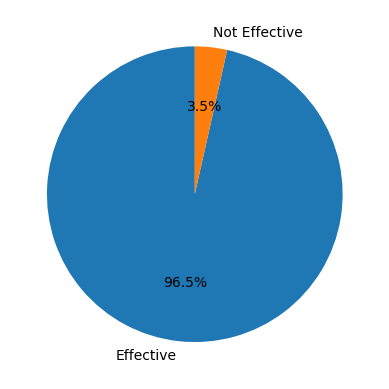

In [14]:
import matplotlib.pyplot as plt
import numpy as np

myLabels = 'Effective', 'Not Effective'

plt.pie(np.array(visualization_df['effective_vaccine'].value_counts()), 
        labels = myLabels, 
        startangle = 90,
        autopct='%1.1f%%')

plt.show()

<b>Finding: </b>From the above graph, it is evident that only 3.5% people strongly believe that the vaccine is not effective. It is also clear that we have an imbalanced data set where one class (referring to 96.5% portion) is much more than the other class (referring to 3.5% portion). We have to balance this data set while we create our model so that our model does get biased due to more number of samples in one class.

<b><u><font size="4">Q1. Were people with certain diseases like diabetes say that the vaccine is ineffective ?</font></u></b>

To solve this problem statement, we will first understand the correlation between <b>diabetes_prevalence</b> and <b>effective_vaccine</b>

<AxesSubplot:xlabel='effective_vaccine', ylabel='diabetes_prevalence'>

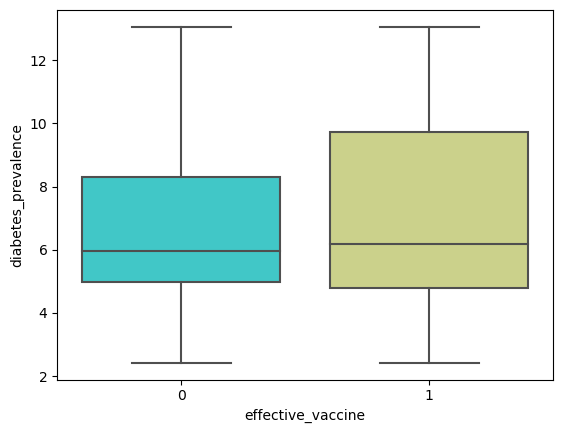

In [15]:
import seaborn as sns

sns.boxplot(x='effective_vaccine', y='diabetes_prevalence', data=visualization_df, palette='rainbow')

<b>Finding: </b>From the above graph, the means of box plots are almost in one line which means that these two columns are not correlated with each other or diabetes_prevalence will not have a good enough impact on the output variable. Therefore, we will not select this feature while modelling.

<b><u><font size="4">Q2. Were people hesitant because of certain political beliefs or trust ?</font></u></b>

To solve this problem statement, we will first understand the correlation between <b>trust_on_government</b> and <b>effective_vaccine</b>.

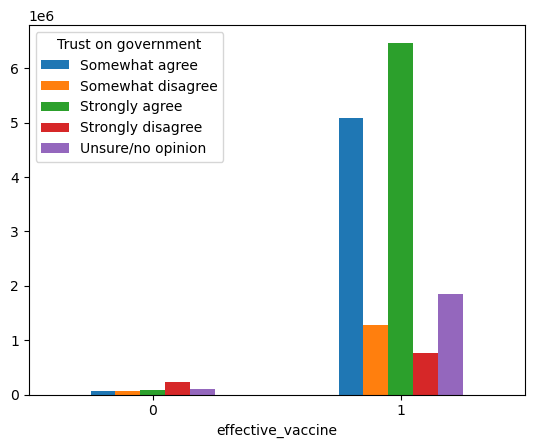

In [16]:
crossTb_govt = pd.crosstab(visualization_df['effective_vaccine'], visualization_df['trust_on_government'])
crossTb_govt.plot(kind='bar', rot=0).legend(title='Trust on government')

<b>Finding: </b>Clearly, we have more data for the people who believe in the government and also believe in the effectiveness of the vaccine. We have less data to support our opposite finding (where people who don't believe in the government also don't believe in the effectiveness of vaccine). This feature will have larger impact in predicting the positive outcome.

<b><u><font size="4">Q3. Were people that don't believe in the science behind it say that the vaccine is ineffective ?</font></u></b>

To solve this problem statement, we will first understand the correlation between <b>trust_on_science</b> and <b>effective_vaccine</b>

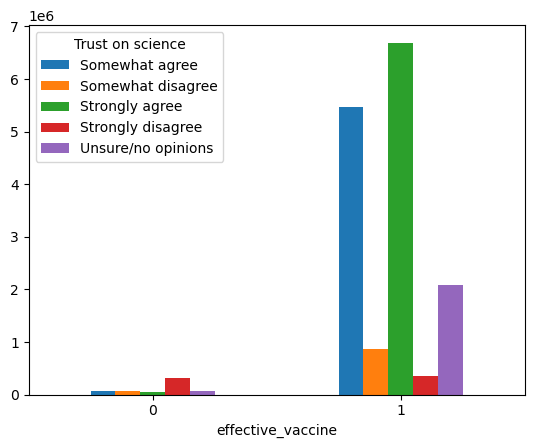

In [17]:
crossTb_sci = pd.crosstab(visualization_df['effective_vaccine'], visualization_df['trust_on_science'])
crossTb_sci.plot(kind='bar', rot=0).legend(title='Trust on science')

<b>Finding: </b>Clearly, we have more data for the people who believe in the science and also believe in the effectiveness of the vaccine. We have less data to support our opposite finding (where people who don't believe in the science also don't believe in the effectiveness of vaccine). This feature will have larger impact in predicting the positive outcome.

<b><u><font size="4">Q4. Were people who say that the vaccines are not safe are also saying that it is ineffective ?</font></u></b>

To solve this problem statement, we will first understand the <b>correlation between people_are_trustworthy and effective_vaccine</b>

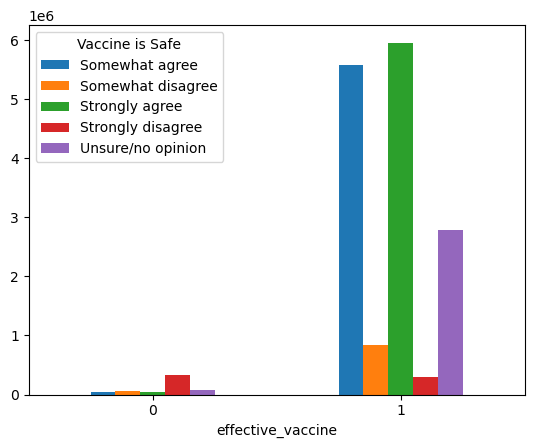

In [18]:
crossTb_gt = pd.crosstab(visualization_df['effective_vaccine'], visualization_df['safe_vaccine'],)
crossTb_gt.plot(kind="bar", rot=0).legend(title='Vaccine is Safe')

<b>Finding: </b>Clearly, we have more data for the people who believe that the vaccine is safe also believe in the effectiveness of the vaccine. We have less data to support our opposite finding (where people who don't believe that the vaccine is safe also don't believe in the effectiveness of vaccine). This feature will have larger impact in predicting the positive outcome.

<b><u><font size="4">Q5. Could profession impact the thinking of vaccine effectiveness ?</font></u></b>

To solve this problem statement, we will first understand the <b>correlation between Profession and effective_vaccine</b>

<AxesSubplot:xlabel='effective_vaccine'>

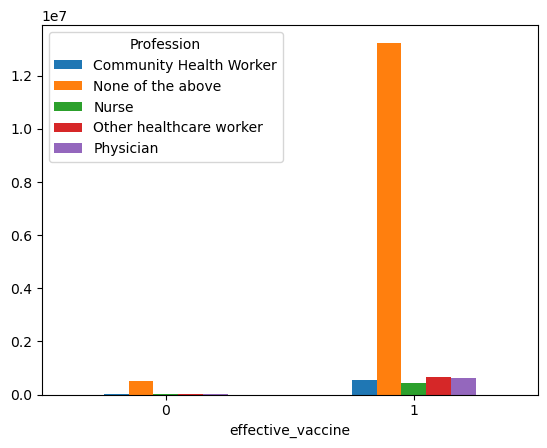

In [19]:
crossTb_prof = pd.crosstab(visualization_df['effective_vaccine'], visualization_df['Profession'])
crossTb_prof.plot(kind="bar", rot=0)

<b>Finding: </b>People in different sectors of their profession all believe that the vaccine is effective. Again, we have more data to support the positive outcome.

<b><u><font size="4">Q6. Does people who think that COVID-19 is not a dangerous threat also thinks that the vaccine is ineffective ?</font></u></b>

To solve this problem statement, we will first understand the <b>correlation between health_threat and effective_vaccine</b>

<AxesSubplot:xlabel='effective_vaccine'>

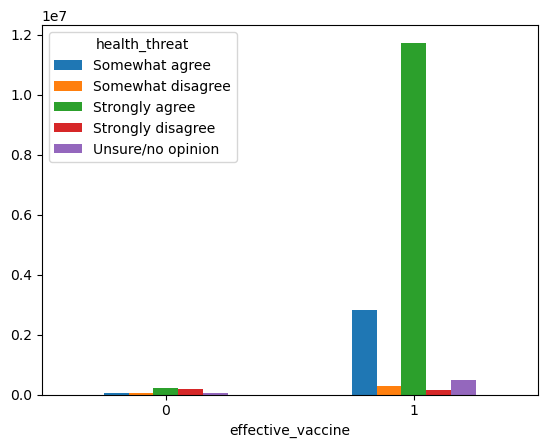

In [20]:
crossTb_ht = pd.crosstab(visualization_df['effective_vaccine'], visualization_df['health_threat'])
crossTb_ht.plot(kind="bar", rot=0)

<b>Finding: </b>Clearly, we have more data for the people who believe that the covid-19 is a dangerous threat also believe in the effectiveness of the vaccine. We have less data to support our opposite finding (where people who don't believe that the covid-19 is a dangerous threat also don't believe in the effectiveness of vaccine). Again, this feature will have larger impact in predicting the positive outcome.

After visualizing the graphs on different problem statements, we will now create our <b>Effective Vaccine model</b> and perform <b>Logistic Regression</b> because this is a classification problem where the output (effective_vaccine) is either Yes(1) or No(0). The features that we are interested in are as below :-

1. trust_on_science
2. trust_on_government 
3. Profession
4. safe_vaccine
5. health_threat

# 5. Split Training and Test data sets

To ensure that the fitted model is generalizable to unseen data, we always train it with some data while evaluating the model and forecast the outcome with holdout/unseen data. As a result, we must divide our dataset into training and test datasets.

To accomplish this, we will use the b>train_test_split/b> method with the following parameters:

   1. test_size = 0.2 which means that we are keeping 20% of the dataset as the test dataset.
   2. stratify=y; returns training and test subsets that have the same proportions of class labels as the input dataset.
   
To verify the specifications, we can print out the shapes for both the training and test sets.

In [21]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(new_df[['trust_on_science', 'trust_on_government', "Profession", 'safe_vaccine', 'health_threat']])

y = pd.DataFrame(new_df['effective_vaccine'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12818830, 5)
(3204708, 5)
(12818830, 1)
(3204708, 1)


Let's check if the outcomes are actually balanced out across y_train and y_test

In [22]:
print(y_train.value_counts(normalize=True))

print(y_test.value_counts(normalize=True))

effective_vaccine
1                    0.964856
0                    0.035144
dtype: float64
effective_vaccine
1                    0.964856
0                    0.035144
dtype: float64


It looks balanced now, however, the supporting data for negative outcome is less which is why you see only 3.5% negative outcome (0.035144) could be distributed. This is because of our data set itself.

# 6. Modelling

After splitting the data set into training and test, we will now create our Effective Vaccine model with the help of Logistic regression.

In [23]:
from sklearn.linear_model import LogisticRegression

# create model
effective_vaccine_model = LogisticRegression(C=1, random_state=0)

# Implementing our pipe
effective_vaccine_model.fit(X_train, y_train['effective_vaccine'])
    
# Use the trained model to create predictions on train and test data
y_train_pred = effective_vaccine_model.predict(X_train)
y_test_pred = effective_vaccine_model.predict(X_test)

<b><u><font size="4">Accuracy</font></u></b>

Let's now see how our model peform in train and test data.

The code below creates two new daframes, one for train data and one for test data. Both datasets contain actual values as well as fitted values.

In [24]:
train = pd.DataFrame({"actual": y_train['effective_vaccine'].values,
                      "fitted": y_train_pred})
train.head()

,actual,fitted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [25]:
test = pd.DataFrame({"actual": y_test['effective_vaccine'].values,
                     "fitted": y_test_pred})
test.head()

,actual,fitted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [26]:
from sklearn.metrics import accuracy_score

print("Accuracy on train:", accuracy_score(train.actual, train.fitted))
print("Accuracy on test:", accuracy_score(test.actual, test.fitted))

Accuracy on train: 0.9749818821218473
Accuracy on test: 0.9749465473921493


The accuracy of our model is very high. Furthermore accuracy on train and test data are similar.

This means that our model neither underfit nor overfit. It simply fits very well on unseen data. Hence, it does not need any tuning phase.

<b><u><font size="4">Baseline</font></u></b>

Let's see if 0.97 a good accuracy or not by training a dummy classifier on most frequent cases.

In [27]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.score(X, y)

0.9648557016559015

Our original estimated accuracy is 0.9749, which is nearer to what we get from the dummy classifier (0.9648).

<b><u><font size="4">Confusion Matrix</font></u></b>

The code below displays the accuracy matrix on test data.

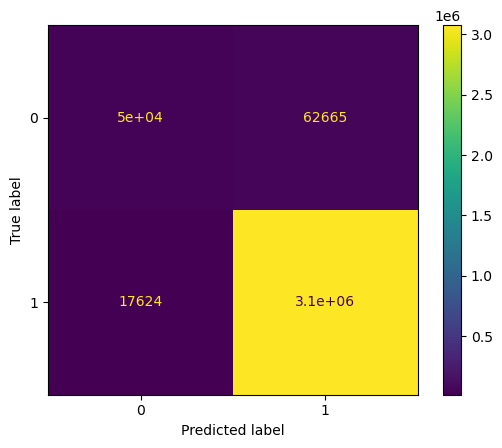

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Ploting the confusion matrix
cm = confusion_matrix(test.actual, test.fitted, labels=effective_vaccine_model.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=effective_vaccine_model.classes_)

cm_display.plot()


The majority of the elements are in the diagonal, implying that the majority of the predictions are right. However, there are 17624 Flase Negatives (which means these many values were predicted as 0 but actually they were 1) and 62665 False Positives (which means these many values were predicted as 1 but actually they were 0). We can still live with False Negatives because our model has a high accuracy in predicting positive outcomes (1) but False Positives are something to loot at.

In [29]:
from sklearn.metrics import classification_report

# detailed classification report
print(classification_report(test.actual, test.fitted))

              precision    recall  f1-score   support

           0       0.74      0.44      0.55    112627
           1       0.98      0.99      0.99   3092081

    accuracy                           0.97   3204708
   macro avg       0.86      0.72      0.77   3204708
weighted avg       0.97      0.97      0.97   3204708



Clearly from the above results, the model has a great "f1-score of 0.99" while predicting positive outcome where as an average "f1-score of 0.55" while predicting negative outcome. The overall accuracy of the model is 97% but it is evident by now that the model has been able to predict the positive outcomes much better than the negative outcomes. We can do resampling here by using StratifiedKFold technique.

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# create model
model = LogisticRegression(C=1, random_state=0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'f1_macro'

scores = cross_validate(model, X, y.values.ravel(), scoring=scoring, cv=cv)

print("Macro Average F1-score: ", np.mean(scores['test_score']))

Macro Average F1-score:  0.7708282089713513


Even with the resampling technique, we get the same result of F1-score. F1-score as 1 is the best score whereas 0 is the worst. Our F1-score lies towards 1, therefore, we can say that our model is performing better than an average model. Moreover, this data set is a survey results where having F1-score as 0.77 is a much better result. This is not a critical domain like healthcare or fraud detection system where we aim to achieve F1-score as 1. 

Let's also understand the correlation between the trained features.

In [31]:
X_train.corr()

,trust_on_science,trust_on_government,Profession,safe_vaccine,health_threat
trust_on_science,1.000000,0.405382,0.037761,0.654872,0.366563
trust_on_government,0.405382,1.000000,0.058832,0.383250,0.200449
Profession,0.037761,0.058832,1.000000,0.043266,0.009388
safe_vaccine,0.654872,0.383250,0.043266,1.000000,0.375802
health_threat,0.366563,0.200449,0.009388,0.375802,1.000000


Let's also plot the above results in Heat Map to understand this visually.

<AxesSubplot:>

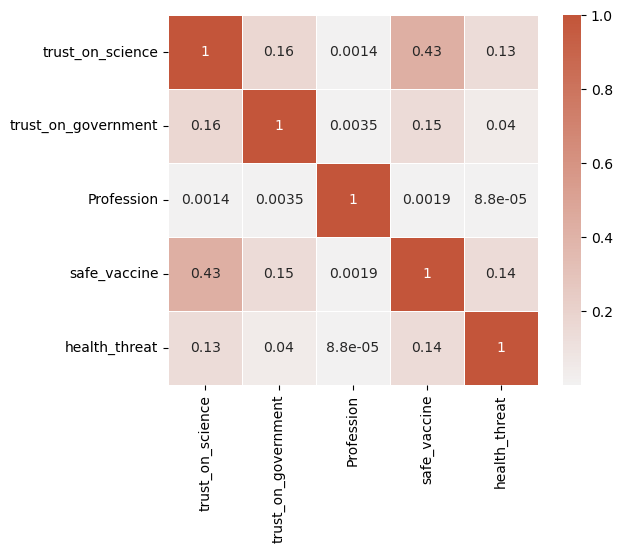

In [32]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(X_train.corr()**2, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)

Clearly, we don't have multi-collinearity. All the features that we took for the modelling are independent. This also depicts the picture of our Logistic Regression model that it is interpretable. Also, none of the feature that we took was unimportant. We can also confirm on this by evaluating feature scores.

In [32]:
# get feature importance
effective_vaccine_model.coef_[0]

array([ 4.03112304,  4.50325981, 12.28591395,  4.45092988,  5.23672904])

Clearly, the feature scores have positive coefficients and are not zero or close to zero. Therefore, all the features that we took were important and we can not drop any of them.

# 7. Summary

1. We started by merging two data sets into one and then filtered the records from 1st of January, 2020 until 31st of December, 2021.
2. We did feature selection and data cleaning.
3. As part of data processing, we transformed the categorical features to numerical values by performing Target Encoding and also transformed the output variable to binary as we were dealing with the classification problem.
4. With the help of multiple visualizations, we observed that we have more data to support positive outcomes.
5. We also have seen the similar result in confusion matrix.
6. To confirm whether we are not judging any feature incorrectly for the model prediction, we also saw each feature importance.

# 8. Conclusion

1. We have a strong conclusion on the people who mostly agrees on different parameters like trust on government, trust on science, vaccine is safe and covid-19 is a dangerous threat, also agrees that the vaccine is effective.

2. These people are not hesitant towards the vaccine.

3. We do have some supported data on the people who does not agree on above parameters and also does not agree that the vaccine is effective. Clearly, these are the people who are vaccine hesitant.

4. If we could have more data to support negative outcomes as well, we would be in a strong position to confirm that above point is always true in all the possible scenarios.

5. We didn't perform p-value testing to understand the correlation because it was very evident from the visualization itself. We also got the similar findings from the modelling.

6. We have used a statistical data where the model score is not supposed to be 100% accurate or close to that. Getting F1-score of 0.55 on the negative outcome with such less supported data is also a good understanding on the people's sentiments.

7. Usually, when we do sentiment analysis, we does not seek for 100% accuracy rather we seek for an understanding on in which way and how we should proceed.

<b><font size="5">Pros</font></b>

1. We have a concrete result on the people's sentiment for the positive outcome. This will be a motivating factor for the government and stakeholders to boost up the vaccine production.

2. We have a good overall F1-score of 0.77 which is again a good result when it comes to sentiment analysis.

<b><font size="5">Cons</font></b>

1. As this is a public opinion, it is very hard to find the balanced data set.

2. Imbalanced data set gives a picture on the model that it is bias when actually it is not.

3. Even with the StratifieldKFold, we got the similar scores. We could have also done this with other models like Decision Trees or Ensembling that outperforms Logistic Regression on the imbalance data set. But we are not sure because we have done the resampling here which does the balancing on the data set.